## Practice problems for systems of ODEs



Here are some problems from past homeworks, quizzes and exams that you can practice on.



## Cooling a container problem



**This is an exam problem. It is open note, and you may consult the internet. By turning in this problem, you agree that the work is your own, and you did not work with anyone to complete it. Anything else is considered cheating. If you see students working together on this problem, it is cheating and you should report it.**

A small container of liquid are initially at 150 °F.  To cool both the container and the liquid to room temperature (70 °F, the container is immersed in a bath at 32°F.  Balancing the rate of change of energy storage between the liquid and the container with the rate of convective heat transfer (liquid – container and container – bath) leads to a coupled system of equations, where L is the temperature of the liquid and C is the temperature of the container.  Using the parameters given, plot the temperature of the liquid and the container as a function of time.

$\frac{dL}{dt} = \frac{A_i h}{\rho_1 c_{p1} V_1}(C - L)$

$\frac{dC}{dt} = \frac{A_o h}{\rho_2 c_{p2} V_2}(32-C) + \frac{A_i h}{\rho_2 c_{p2} V_2}(L-C)$

| |Liquid (1)|Container (2)|
|---|---|---|
| Mass density [lbm/ft3]|62|139|
| Specific heat [Btu/lbmF]|1.00|0.2|
| Volume [ft3]|0.03|0.003|

$A_i=0.4$ ft<sup>2</sup> and $A_o=0.5$ ft<sup>2</sup>
Assume $h = 8.8$ Btu/hr ft<sup>3</sup> °F



### At what time should the container be removed for the liquid inside it to be at room temperature (70 °F)? What is the temperature of the container at that time?



In [31]:
import numpy as np
from scipy.integrate import solve_ivp as ivp
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [57]:
def model(t,X):
    TL   = X[0]
    TC   = X[1]
    Ai   = 0.4 #ft^2
    Ao   = 0.5 #ft^2
    h    = 8.8 #BTU/hr/ft^2/F
    rho1 = 62 #lbm/ft3
    rho2 = 139 #lbm/ft3
    CP1  = 1.00 #BTU/lbm/F
    CP2  = 0.2 #BTU/lbm/F
    V1   = 0.03 #ft3
    V2   = 0.003 #ft3
    
    dTLdt = Ai*h/rho1/CP1/V1*(TC - TL)
    dTCdt = Ao*h/rho2/CP2/V2*(32 - TC) + Ai*h/rho2/CP2/V2*(TL - TC)
    return np.array([dTLdt, dTCdt])

In [54]:
def event(t,X):
    TL, TC = X
    return TL - 70
event.terminal = True

In [59]:
TL0 = 150
TC0 = 150
X0  = np.array([TL0, TC0])
tspan = np.array([0, 15])

[1.09784996]


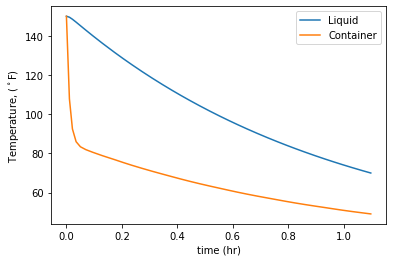

In [60]:
sol = ivp(model, tspan, X0, events = event)
X   = sol.y.T
plt.plot(sol.t,X)
plt.ylabel('Temperature, ($^\circ$F)')
plt.xlabel('time (hr)')
plt.legend(['Liquid', 'Container'])
print(sol.t_events[0])

In [61]:
sol = ivp(model, tspan, X0, dense_output = True)
eq1 = lambda time: sol.sol(time)[0] - 70
opt.newton(eq1, 1)


1.0978499581103944

### Explain qualitatively why the two temperatures profiles look different.



### What will happen to the temperatures after the container is removed from the bath?



### solution



The solution looks like this.

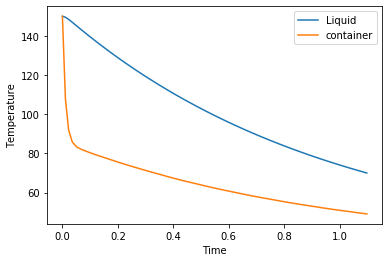



## stirred tank heater



This tank has a heater in it and it is well-stirred. There is an inlet that allows flow into the tank, and flow out is gravity-driven.

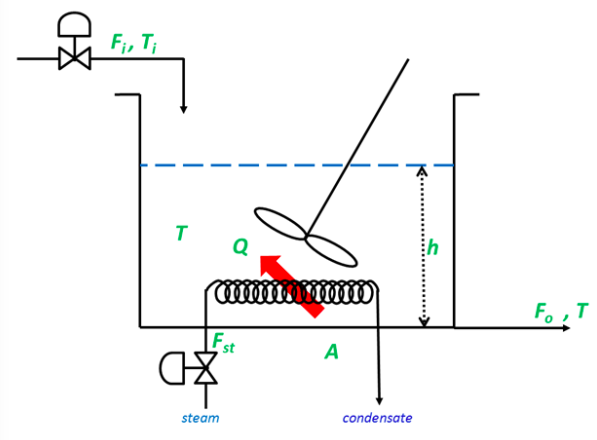

A mass balance on the tank yields:

$A \frac{dh}{dt} = F_i - c \sqrt{h}$

The energy balance yields:

$A h \frac{dT}{dt} = F_i (T_i - T) + \frac{Q}{\rho c_p}$

The following constants are provided (you can assume the units are consistent).

| constant|value||
|---|---|---|
| h||liquid height|
| A|10|tank area|
| c|1|valve constant|
| cp|1|heat capacity|
| &rho;|1|density|
| F<sub>i</sub>|1|flow in|
| Q|1|heat in|

After a long time of operation, the tank has reached a steady state height of 1, and a temperature of 30 with $Ti=29$. However, at $t=0$ there is a disturbance, and suddenly $Ti=30$. Use the information above to plot the height and temperature of the tank as a function of time in separate plots, and estimate how long it will take to reach a new steady state value. Explain why the height and temperature change the way they do.



In [80]:
def model2(t, X):
    h, T = X
    A    = 10
    c    = 1
    cp   = 1
    rho  = 1
    Fi   = 1
    Q    = 1
    Ti   = 30
    
    dhdt = 1/A*(Fi - c*np.sqrt(h))
    dTdt = 1/A/h*(Fi*(Ti - T) + Q/rho/cp)
    return np.array([dhdt, dTdt])

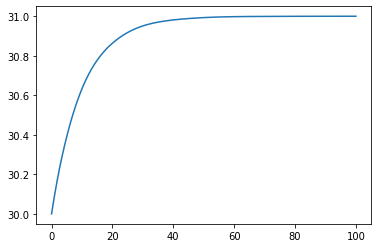

In [89]:
X0       = np.array([1, 30]) 
tspan    = np.array([0, 100])
teval, h = np.linspace(*tspan, 5000, retstep=True)
sol      = ivp(model2, tspan, X0, method = 'Radau', t_eval = teval)
t        = sol.t
Y        = sol.y.T
plt.plot(t,Y[:,1])

### solution



Here is a partial solution.

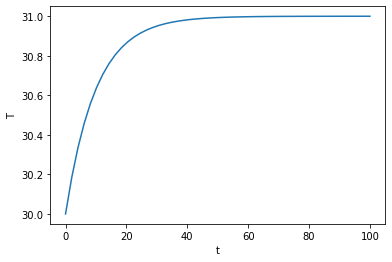



## Practice with an event for root finding



The function $y = x^3 + 6 x^2 - 4 x - 24 = 0$ has three roots. Plot this function to get an idea of where they are:



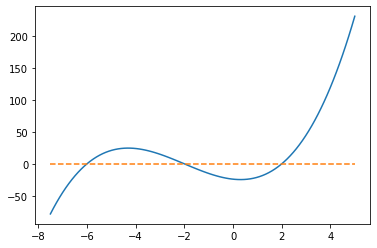

In [102]:
def f(x):
    return x**3 + 6*x**2 - 4*x - 24
x = np.linspace(-7.5, 5, 100)
plt.plot(x,f(x))
plt.plot([x.min(), x.max()], [0, 0], '--')

One way to find these roots is by using an event function in an ode integrator that is integrating the derivative of that function. You define your event as when $y=0$.

Write a function that defines $y'(x)$



In [112]:
def fprime(x, y):
    return 3*x**2 + 12*x - 4

Write a function that defines an event for when $y=0$.



In [117]:
def event(x,y):
    return y
event.terminal = False

Use solve\_ivp to find the three roots.



array([0.00000000e+00, 7.10542736e-15, 1.42108547e-14])

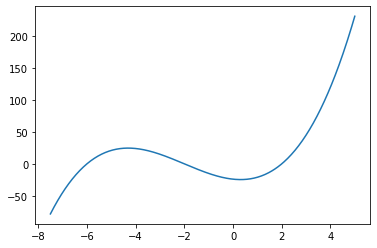

In [139]:
x0 = x.min()
y0 = np.array([f(x0)])
tspan = np.array((x.min(),x.max()))
teval, h = np.linspace(*tspan, 500, retstep = True)
sol = ivp(fprime, tspan, y0, method = 'RK45', events = event, max_step = h)
#print(sol.t_events)
plt.plot(sol.t, sol.y.T)
f(sol.t_events[0])

The solution should be x = (-6, -2, 2). Verify that that these are the roots.

